In [3]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
pd.set_option('display.max_columns',None)
import numpy as np



In [4]:
#import data
test = pd.read_csv('test-3.csv',dtype={'fullVisitorId' : 'str'})
train = pd.read_csv('train-2.csv',dtype={'fullVisitorId' : 'str'})

In [5]:
test.head()

,channelGrouping,purchase_date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6.17E+18,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",6167871330617112363_1508151024,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""4""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508151024,2,1508151024
1,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6.44E+17,"{""continent"": ""Europe"", ""subContinent"": ""South...",0643697640977915618_1508175522,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""5"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508175522,1,1508175522
2,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6.06E+18,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",6059383810968229466_1508143220,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""7"", ""pageviews"": ""7"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508143220,1,1508143220
3,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2.38E+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2376720078563423631_1508193530,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""8"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508193530,1,1508193530
4,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2.31E+18,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2314544520795440038_1508217442,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""9"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508217442,1,1508217442


In [6]:
#add json columns in test dataset
json_columns= ['device','geoNetwork','totals','trafficSource']

for i in json_columns :
    test = test.join(pd.DataFrame(test.pop(i).apply(json.loads).values.tolist()))


In [7]:
#add json columns in test dataset
json_columns= ['device','geoNetwork','totals','trafficSource']

for i in json_columns :
    train = train.join(pd.DataFrame(train.pop(i).apply(json.loads).values.tolist()))

In [8]:
#change dtype from string to date
test['date'] = test['purchase_date']
test['date'] = test['date'].apply(lambda x: pd.to_datetime(str(x), format= '%Y%m%d'))
train['date'] = train['date'].apply(lambda x: pd.to_datetime(str(x), format= '%Y%m%d'))

In [7]:
#columns in train not in test
train.columns.difference(test.columns)

Index(['campaignCode', 'transactionRevenue'], dtype='object')

In [46]:

drop_column = ['campaignCode','hits']
for i in drop_column:
    train = train.drop(i,axis = 1)

In [25]:
train = train.drop('adwordsClickInfo',axis = 1)

In [27]:
test = test.drop('adwordsClickInfo',axis = 1)

In [11]:
train['transactionRevenue'] = train['transactionRevenue'].astype(float)


In [12]:
##train.groupby('fullVisitorId')['transactionRevenue'].sum().reset_index()

,fullVisitorId,transactionRevenue
0,0000010278554503158,0.0
1,0000020424342248747,0.0
2,0000027376579751715,0.0
3,0000039460501403861,0.0
4,0000040862739425590,0.0
5,000005103959234087,0.0
6,0000062267706107999,0.0
7,0000068403966359845,0.0
8,0000085059828173212,0.0
9,0000093957001069502,0.0


In [29]:
column_remove = [col for col in test.columns if test[col].nunique(dropna= False)== 1]

In [30]:
for col in column_remove:
    test = test.drop(col, axis = 1)

In [31]:
for col in column_remove:
    train = train.drop(col,axis = 1)

In [9]:
for col in test.columns:
    print(col, test[col].nunique(dropna = False))

channelGrouping 8
purchase_date 272
fullVisitorId 3826
sessionId 803863
socialEngagementType 1
visitId 779504
visitNumber 446
visitStartTime 780264
browser 109
browserSize 1
browserVersion 1
deviceCategory 3
flashVersion 1
isMobile 2
language 1
mobileDeviceBranding 1
mobileDeviceInfo 1
mobileDeviceMarketingName 1
mobileDeviceModel 1
mobileInputSelector 1
operatingSystem 22
operatingSystemVersion 1
screenColors 1
screenResolution 1
city 732
cityId 1
continent 6
country 219
latitude 1
longitude 1
metro 109
networkDomain 25750
networkLocation 1
region 376
subContinent 23
bounces 2
hits 229
newVisits 2
pageviews 161
visits 1
adContent 52


TypeError: unhashable type: 'dict'

In [49]:
test = test.drop('hits', axis = 1)

In [50]:
test.shape

(804684, 28)

In [51]:
train.shape

(903653, 29)

In [52]:
train.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,operatingSystem,city,continent,country,metro,networkDomain,region,subContinent,bounces,newVisits,pageviews,transactionRevenue,adContent,campaign,isTrueDirect,keyword,medium,referralPath,source
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1,1,1,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1,1,1,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1,1,1,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1,1,1,NaN,NaN,(not set),NaN,google + online,organic,NaN,google
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1,NaN,1,NaN,NaN,(not set),True,(not provided),organic,NaN,google


In [53]:
train.keywordyword.nunique()

3659

In [56]:
train.transactionRevenue.isnull().sum()/len(train.transactionRevenue)

0.9872572768529513

In [116]:
missing_percentage =(train.isnull().sum()/len(train)).sort_values(ascending = False)

In [117]:
missing_percentage

transactionRevenue    0.987257
referralPath          0.633774
keyword               0.556551
bounces               0.501324
pageviews             0.000111
source                0.000000
operatingSystem       0.000000
date                  0.000000
fullVisitorId         0.000000
sessionId             0.000000
visitId               0.000000
visitNumber           0.000000
visitStartTime        0.000000
browser               0.000000
deviceCategory        0.000000
isMobile              0.000000
country               0.000000
city                  0.000000
continent             0.000000
metro                 0.000000
networkDomain         0.000000
region                0.000000
subContinent          0.000000
newVisits             0.000000
campaign              0.000000
isTrueDirect          0.000000
medium                0.000000
channelGrouping       0.000000
dtype: float64

In [95]:
train[(train.adContent.isnull()) & (train.transactionRevenue.isnull())].count()

channelGrouping       881335
date                  881335
fullVisitorId         881335
sessionId             881335
visitId               881335
visitNumber           881335
visitStartTime        881335
browser               881335
deviceCategory        881335
isMobile              881335
operatingSystem       881335
city                  881335
continent             881335
country               881335
metro                 881335
networkDomain         881335
region                881335
subContinent          881335
bounces               445498
newVisits             692746
pageviews             881236
transactionRevenue         0
adContent                  0
campaign              881335
isTrueDirect          264647
keyword               386061
medium                881335
referralPath          325526
source                881335
dtype: int64

In [97]:
#droping adContent column because there are almost 99% missing value
train = train. drop('adContent',axis = 1)

In [76]:
#newVisits = 1 and if it is NAN it means it is not new visits

train[(train.newVisits.isnull()) & (train.visitNumber != 1 )].visitNumber.count()/len(train)

0.22198011847468

In [99]:
#add 0 if newVisits is null because we checked with visitNumber and they are more than one visit. 
#SO, they are not newVisits
train['newVisits'] = train['newVisits'].fillna(0)


In [100]:
train.isTrueDirect.unique()

array([nan, True], dtype=object)

In [102]:
#dealing with missing value in isTrueDirect column
train['isTrueDirect']= np.where(train.isTrueDirect== True,1,0)

In [113]:
train[train['referralPath'] == '/'].count()/len(train)

channelGrouping       0.083575
date                  0.083575
fullVisitorId         0.083575
sessionId             0.083575
visitId               0.083575
visitNumber           0.083575
visitStartTime        0.083575
browser               0.083575
deviceCategory        0.083575
isMobile              0.083575
operatingSystem       0.083575
city                  0.083575
continent             0.083575
country               0.083575
metro                 0.083575
networkDomain         0.083575
region                0.083575
subContinent          0.083575
bounces               0.016001
newVisits             0.083575
pageviews             0.083552
transactionRevenue    0.005700
campaign              0.083575
isTrueDirect          0.083575
keyword               0.000000
medium                0.083575
referralPath          0.083575
source                0.083575
dtype: float64

In [79]:
dict(train.isna().sum(axis=0)).items()

dict_items([('channelGrouping', 0), ('date', 0), ('fullVisitorId', 0), ('sessionId', 0), ('visitId', 0), ('visitNumber', 0), ('visitStartTime', 0), ('browser', 0), ('deviceCategory', 0), ('isMobile', 0), ('operatingSystem', 0), ('city', 0), ('continent', 0), ('country', 0), ('metro', 0), ('networkDomain', 0), ('region', 0), ('subContinent', 0), ('bounces', 453023), ('newVisits', 200593), ('pageviews', 100), ('transactionRevenue', 892138), ('adContent', 892707), ('campaign', 0), ('isTrueDirect', 629648), ('keyword', 502929), ('medium', 0), ('referralPath', 572712), ('source', 0)])

In [82]:
!pip install pandas_profiling

In [83]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

/Users/monaaghaee/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/monaaghaee/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/monaaghaee/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/monaaghaee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/monaaghaee/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/monaaghaee/anaconda3/lib/python3.6/site-packages/ipykernel/k

Number of variables,29
Number of observations,903653
Total Missing (%),15.8%
Total size in memory,193.9 MiB
Average record size in memory,225.0 B
Numeric,3
Categorical,23
Boolean,1
Date,1
Text (Unique),0
Rejected,1


In [84]:
!pip install missingno

In [87]:
!pip install matplotlib

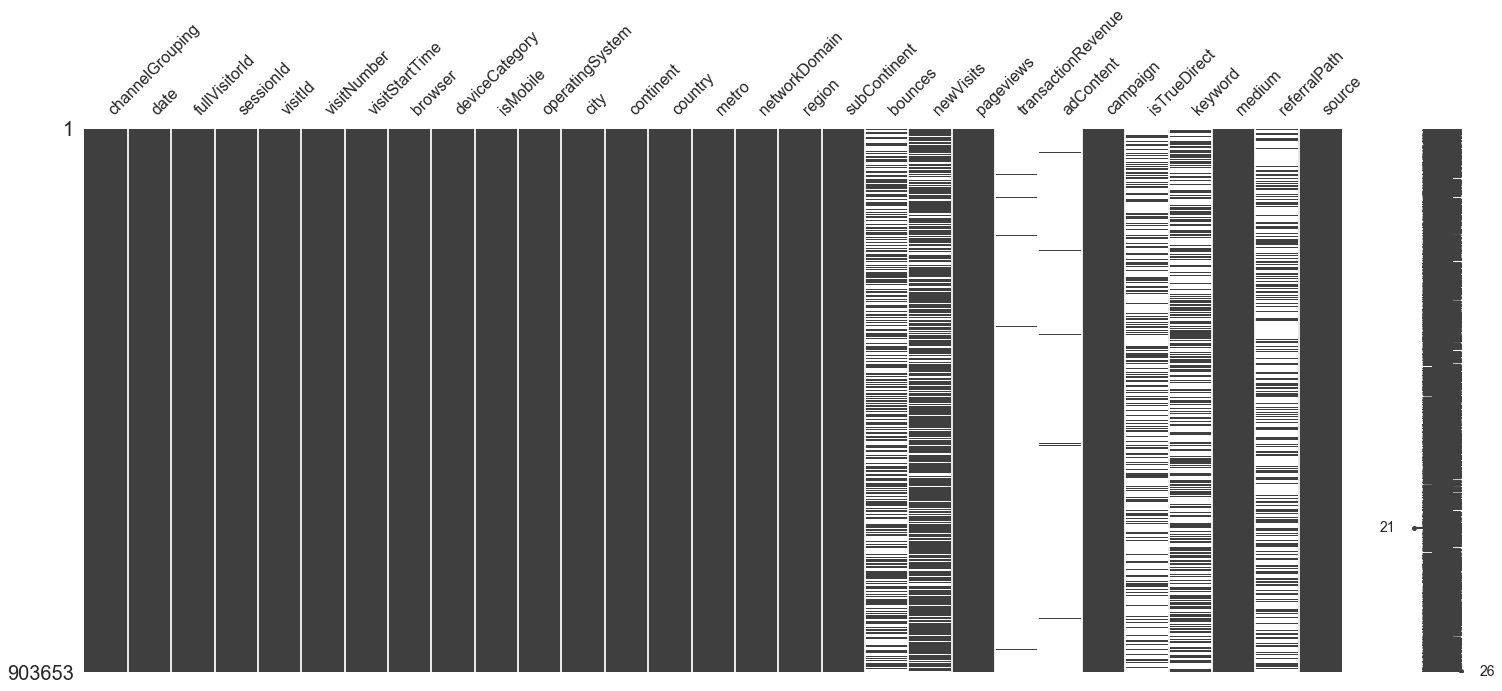

In [92]:
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
msno.matrix(train)
plt.show()

In [ ]:
#I am going to remove adContent because 

In [10]:
train.shape

(903653, 50)

In [12]:
vocabulary_size = train['city'].nunique(dropna = False)
vocabulary_size

649

In [24]:
import collections

#build the dictionary and replace rare words with UNK
def build_dataset (city,n_words):
    """"Process raw inputs into a dataset"""
    count = [['UNK',-1]]
    count.extend(collections.Counter(city).most_common(n_words-1))
    dic = dict()
    for word, _ in count:
        dic[word] = len(dic)
    data = list()
    unk_count = 0
    for word in city:
        index = dic.get(word, 0)
        if index ==0: #dictionary['UNK']
            unk_count += 1
        data.append(index)
    count[0][1] = unk_count
    reversed_dictionary = dict(zip(dic.values(),dic.keys()))
    return data, count, dic , reversed_dictionary
        
##data - list of codes (integers from 0 to vocabulary_size -1 ).
    ##this is the original text but words are replaced by their codes
##count - map of words(string) to count of occurances


In [25]:
count = [['UNK',-1]]

In [26]:
count

[['UNK', -1]]

In [27]:
data, count, dictionary, reverse_dictionary = build_dataset(train['city'],vocabulary_size)

In [29]:
print('Most common words (+UNK)',count[:])

Most common words (+UNK) [['UNK', 3], ('not available in demo dataset', 508229), ('Mountain View', 40884), ('(not set)', 34262), ('New York', 26371), ('San Francisco', 20329), ('Sunnyvale', 13086), ('London', 12607), ('San Jose', 10295), ('Los Angeles', 8670), ('Bangkok', 7709), ('Chicago', 7444), ('Ho Chi Minh City', 7342), ('Istanbul', 6330), ('Bengaluru', 5468), ('Toronto', 5223), ('Hanoi', 5032), ('Seattle', 5025), ('Sydney', 4926), ('Dublin', 4877), ('Sao Paulo', 4106), ('Mumbai', 4099), ('Chennai', 4090), ('Paris', 4013), ('Hyderabad', 3934), ('Austin', 3790), ('Tel Aviv-Yafo', 3542), ('Hong Kong', 3508), ('Jakarta', 3338), ('Singapore', 3299), ('Warsaw', 3288), ('New Delhi', 3209), ('Santa Clara', 3183), ('Palo Alto', 2886), ('Melbourne', 2741), ('Madrid', 2593), ('Mexico City', 2556), ('Washington', 2532), ('Houston', 2475), ('Minato', 2432), ('Seoul', 2380), ('Atlanta', 2352), ('Montreal', 2245), ('Ann Arbor', 2241), ('Kuala Lumpur', 2234), ('Salem', 2227), ('Moscow', 2151), (

In [30]:
print('Sample data', data[:10],[reverse_dictionary[i] for i in data[:10]])

Sample data [60, 1, 35, 1, 1, 1, 1, 74, 1, 1] ['Izmir', 'not available in demo dataset', 'Madrid', 'not available in demo dataset', 'not available in demo dataset', 'not available in demo dataset', 'not available in demo dataset', 'Brisbane', 'not available in demo dataset', 'not available in demo dataset']
